Analyse exploratoire des données (test)

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyxlsb
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit


In [60]:
chemin = r'C:\Users\aslam\Documents\Stage\12-Data\2 - Test Pack 48V Critt M2A\ID3186_05_Sequence_Cyclage_Partie_01.xlsb'
df = pd.read_excel(chemin, sheet_name="Feuil1")

In [94]:
chemin1=r'C:\Users\aslam\Documents\Stage\12-Data\2 - Test Pack 48V Critt M2A\ID3186_05_Sequence_Cyclage_Partie_02.xlsb'
df1 = pd.read_excel(chemin1, sheet_name="Feuil1")

In [96]:
# Remonter toutes les lignes
df = df.shift(-1)

# Supprimer la dernière ligne qui est devenue redondante après le décalage
df = df.drop(df.index[-1])

# Réinitialiser les index
df = df.reset_index(drop=True)
df = df.astype(float)

# Remonter toutes les lignes
df1 = df1.shift(-1)

# Supprimer la dernière ligne qui est devenue redondante après le décalage
df1 = df1.drop(df.index[-1])

# Réinitialiser les index
df1 = df1.reset_index(drop=True)
df1 = df1.astype(float)


In [62]:
df.head()

,t,CycleCnt01,BMS_Tension_A,BMS_Tension_B,BMS_Mode_Ctrl,Phase_Test,Etat_step,SysDate,SysTime,Step.Time,...,C6_CyclingStatus,C7_CyclingStatus,C8_CyclingStatus,C9_CyclingStatus,C10_CyclingStatus,C11_CyclingStatus,C12_CyclingStatus,C13_CyclingStatus,C14_CyclingStatus,C15_CyclingStatus
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000,1.0,3.299,0.0,1.0,0.0,0.0,20220615.0,154118.0,0.000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.001,1.0,3.299,0.0,1.0,0.0,0.0,20220615.0,154118.0,0.001,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.002,1.0,3.299,0.0,1.0,1.0,0.0,20220615.0,154118.0,0.000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.003,1.0,3.299,0.0,1.0,1.0,0.0,20220615.0,154118.0,0.001,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [63]:
df.describe()

,t,CycleCnt01,BMS_Tension_A,BMS_Tension_B,BMS_Mode_Ctrl,Phase_Test,Etat_step,SysDate,SysTime,Step.Time,...,C6_CyclingStatus,C7_CyclingStatus,C8_CyclingStatus,C9_CyclingStatus,C10_CyclingStatus,C11_CyclingStatus,C12_CyclingStatus,C13_CyclingStatus,C14_CyclingStatus,C15_CyclingStatus
count,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,2.083030e+05,208303.000000,208303.000000,...,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000,208303.000000
mean,104.151000,26.795980,2.560762,0.779707,1.248503,2.478447,1.212210,2.022062e+07,118746.222066,1246.538686,...,1.035900,0.750354,0.938037,0.946568,1.178581,0.741674,1.020595,1.031229,1.347244,0.731257
std,60.132041,15.238275,1.374660,1.401379,0.459790,0.867672,0.436979,1.220609e+00,68896.936407,884.214584,...,1.921124,0.432809,1.360000,1.404422,2.340424,0.437715,1.629750,1.666550,2.746833,0.443307
min,0.000000,1.000000,-0.012000,-0.001000,1.000000,0.000000,0.000000,2.022062e+07,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.075500,14.000000,3.299000,0.000000,1.000000,2.000000,1.000000,2.022062e+07,61221.000000,482.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,104.151000,27.000000,3.299000,0.001000,1.000000,2.000000,1.000000,2.022062e+07,120525.000000,1035.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,156.226500,40.000000,3.299000,0.001000,1.000000,2.000000,1.000000,2.022062e+07,174455.000000,2002.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,208.302000,53.000000,3.300000,3.319000,3.000000,5.000000,2.000000,2.022062e+07,235958.000000,3600.001000,...,15.000000,1.000000,15.000000,15.000000,15.000000,1.000000,15.000000,15.000000,15.000000,1.000000


In [64]:
#Correlation entre la tension A et B
df.BMS_Tension_A.corr(df.BMS_Tension_B)

-0.9658070831083156

### Le voltage en fonction du temps

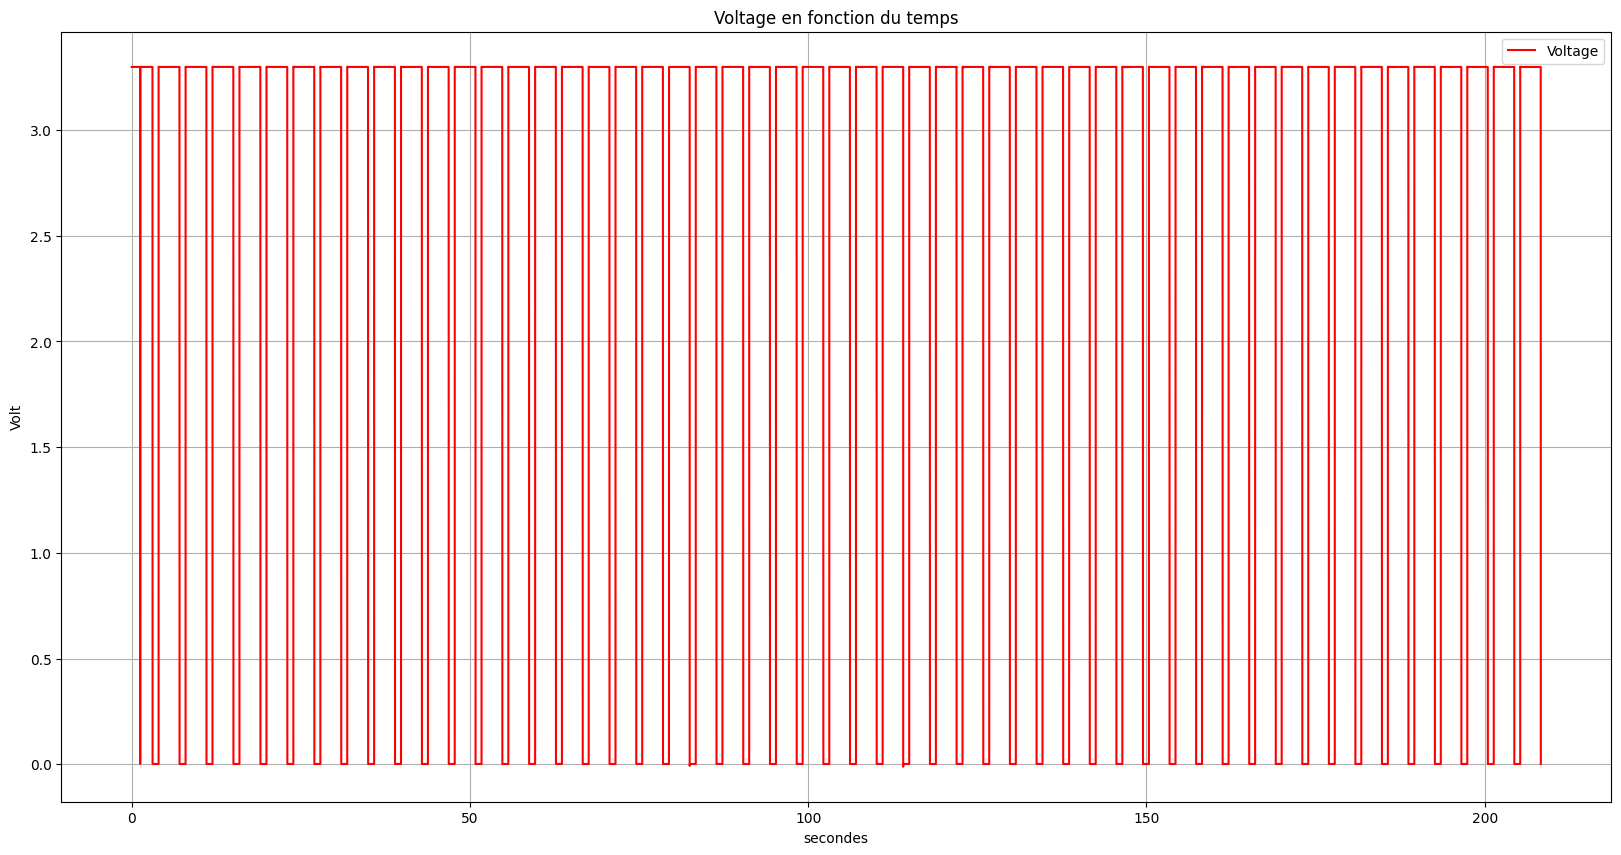

In [131]:
plt.figure(figsize=(20, 10))
plt.plot(df['t'], df['BMS_Tension_A'], color='red')

plt.title('Voltage en fonction du temps')
plt.xlabel('secondes')
plt.ylabel('Volt')

plt.legend(['Voltage'])

plt.grid(True)
plt.show()

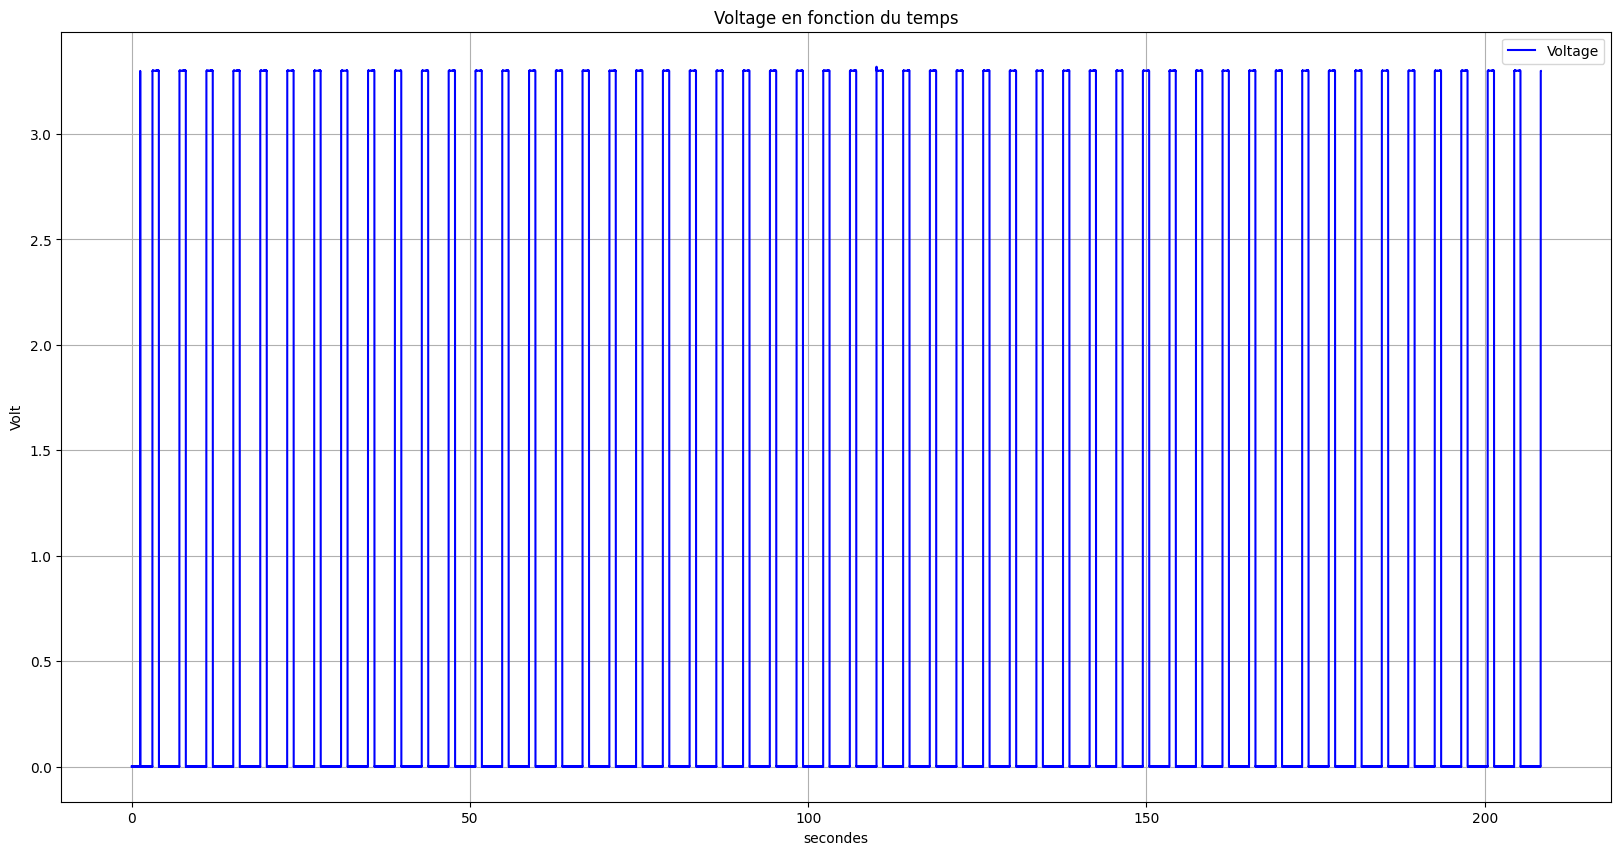

In [133]:
plt.figure(figsize=(20, 10))
plt.plot(df['t'], df['BMS_Tension_B'],color='blue')

plt.title('Voltage en fonction du temps')
plt.xlabel('secondes')
plt.ylabel('Volt')

plt.legend(['Voltage'])

plt.grid(True)
plt.show()

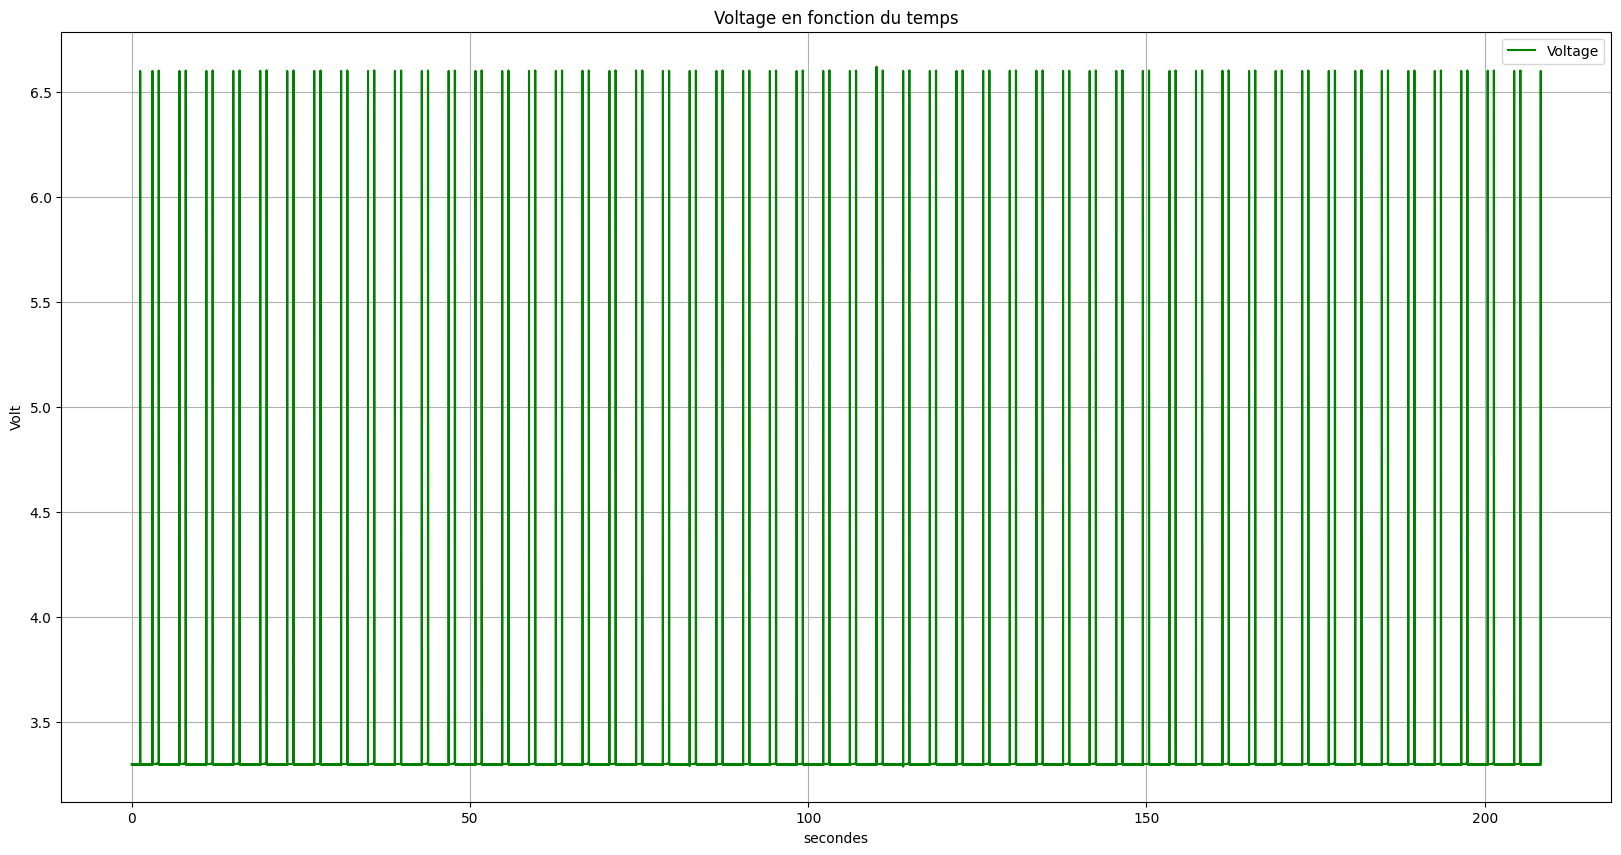

In [135]:
plt.figure(figsize=(20, 10))
plt.plot(df['t'], df['BMS_Tension_A'] + df['BMS_Tension_B'],color='green')

plt.title('Voltage en fonction du temps')
plt.xlabel('secondes')
plt.ylabel('Volt')

plt.legend(['Voltage'])

plt.grid(True)
plt.show()

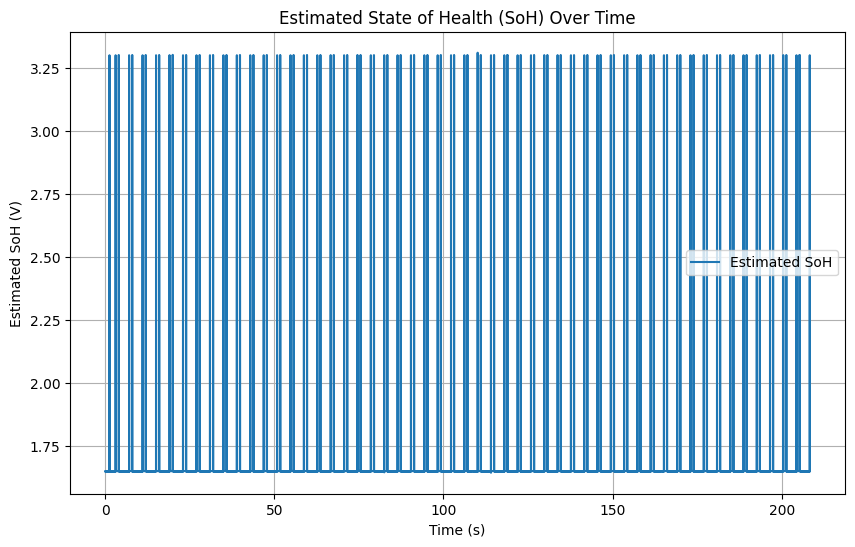

In [143]:
df['Estimated_SoH'] = (df['BMS_Tension_A'] + df['BMS_Tension_B']) / 2

# Tracer le graphique du SoH estimé en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df['t'], df['Estimated_SoH'], label='Estimated SoH')
plt.xlabel('Time (s)')
plt.ylabel('Estimated SoH (V)')
plt.title('Estimated State of Health (SoH) Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Test pour le SOH

$ SOH (\%) = \frac{Capacité\_résiduelle}{Capacité\_nominale} \times 100 $


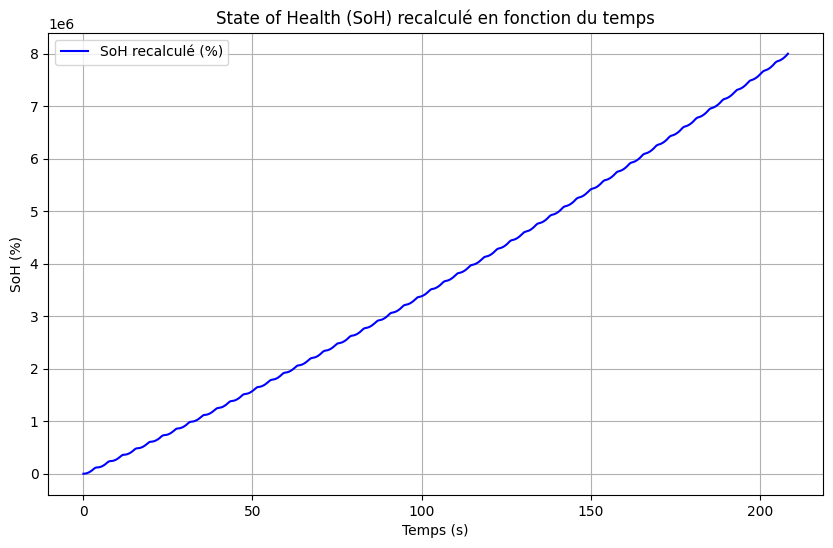

In [152]:
# Capacité nominale maximale de la batterie
capacite_nominale_maximale = 4.2  # Ah

# Convertir les colonnes 'Ah_Charge' et 'Ah_Discharge' en valeurs numériques, en traitant les erreurs
df['Ah_Charge'] = pd.to_numeric(df['Ah_Charge'], errors='coerce')
df['Ah_Discharge'] = pd.to_numeric(df['Ah_Discharge'], errors='coerce')

# Recalculer la charge cumulée et la décharge cumulée
df['charge_cumulee'] = df['Ah_Charge'].cumsum()
df['decharge_cumulee'] = df['Ah_Discharge'].cumsum()

# Recalculer la capacité cumulée
df['capacite_cumulee'] = df['charge_cumulee'] - df['decharge_cumulee']

# Recalculer le SoH en fonction de la capacité cumulée
df['soh'] = (df['capacite_cumulee'] / capacite_nominale_maximale) * 100

# Nettoyer le DataFrame pour supprimer les lignes avec des données de temps non numériques ou manquantes
df_clean = df.dropna(subset=['t', 'soh'])
df_clean['t'] = pd.to_numeric(df_clean['t'], errors='coerce')

# Tracer le SoH recalculé en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df_clean['t'], df_clean['soh'], color='blue', label='SoH recalculé (%)')
plt.title('State of Health (SoH) recalculé en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('SoH (%)')
plt.legend()
plt.grid(True)
plt.show()

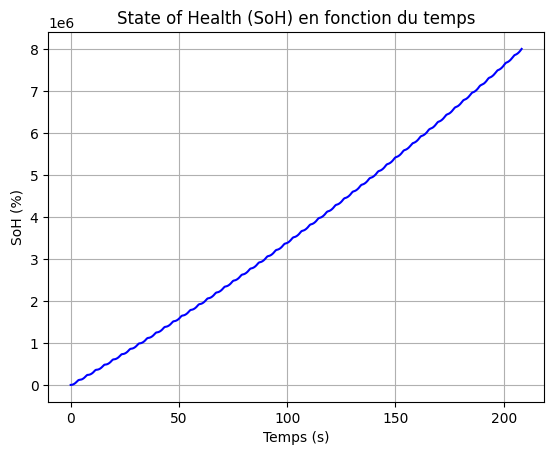

In [139]:
# Capacité nominale maximale de la batterie (en Ah)
capacite_nominale_maximale = 4.2

# Calculer la charge cumulée et la décharge cumulée
df['charge_cumulee'] = df['Ah_Charge'].cumsum()
df['decharge_cumulee'] = df['Ah_Discharge'].cumsum()

# Calculer la capacité cumulée
df['capacite_cumulee'] = df['charge_cumulee'] - df['decharge_cumulee']

# Calculer le SoH en fonction de la capacité cumulée
df['soh'] = (df['capacite_cumulee'] / capacite_nominale_maximale) * 100

# Tracer le SoH en fonction du temps
plt.plot(df['t'], df['soh'], color='blue')
plt.title('State of Health (SoH) en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('SoH (%)')
plt.grid(True)
plt.show()

### Test pour le SOC


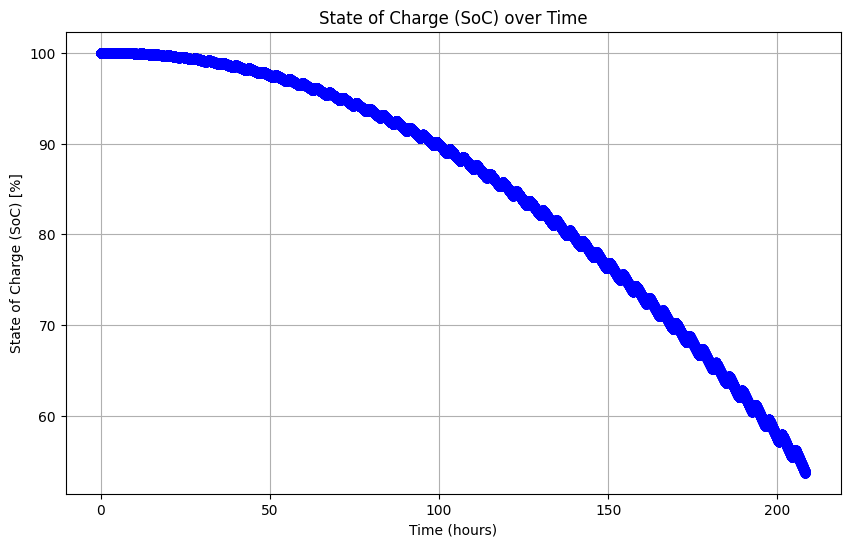

,Time (h),SoC (%)
0,0.000,100.000000
1,0.001,100.000000
2,0.002,100.000000
3,0.003,100.000000
4,0.004,100.000000
...,...,...
208298,208.298,53.715621
208299,208.299,53.716494
208300,208.300,53.717366
208301,208.301,53.718239


In [183]:
# Supposons que 'I' alterne entre charge (+0.5A) et décharge (-0.5A) toutes les heures.
# Nous allons simuler cela sur une période de 10 heures.
n=len(df['t'])
# Initialisation de SoC à 100% pour l'exemple
SoC = np.zeros(n)
SoC[0] = 100  # Le premier élément représente le SoC initial.

# Intégration numérique pour calculer le SoC
for i in range(1, n):
    dt = (df['t'][i] - df['t'][i - 1]) / 3600.0  # Convertir le temps écoulé en heures
    if df['Etat_step'][i] == 1:
        # Utiliser 'Ah_Discharge' comme le courant de décharge, avec un signe négatif
        dSoC = (-df['Ah_Discharge'][i] * dt) / C_bat * 100
    else:
        # Utiliser 'Ah_Charge' comme le courant de charge
        dSoC = (df['Ah_Charge'][i] * dt) / C_bat * 100
    SoC[i] = SoC[i - 1] + dSoC



# Création d'un DataFrame pour la visualisation
df_soc = pd.DataFrame({'Time (h)': df['t'], 'SoC (%)': SoC})

# Tracer le SoC en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df_soc['Time (h)'], df_soc['SoC (%)'], marker='o', linestyle='-', color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('State of Charge (SoC) [%]')
plt.title('State of Charge (SoC) over Time')
plt.grid(True)
plt.show()

df_soc  # Montrer le DataFrame avec les valeurs calculées de SoC

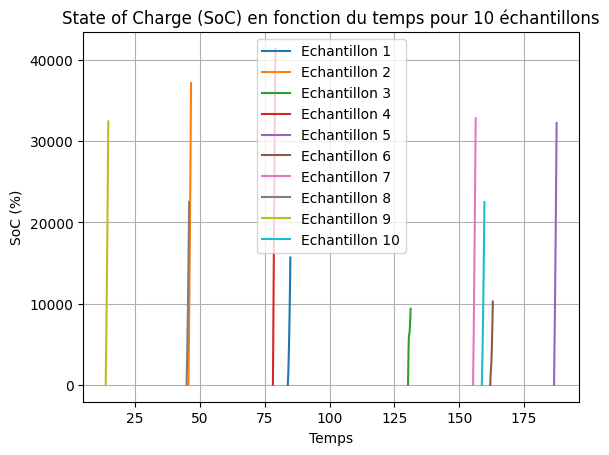

In [162]:
# Capacité nominale maximale de la batterie
capacite_nominale_maximale = 4.2  # Ah

# Générer 10 échantillons aléatoires de taille 1000
nb_echantillons = 10
taille_echantillon = 1000
indices_aleatoires = [np.random.randint(0, len(df)-taille_echantillon) for _ in range(nb_echantillons)]
echantillons = [df.iloc[idx:idx+taille_echantillon].copy() for idx in indices_aleatoires]

# Calculer et tracer le SoC en fonction du temps pour chaque échantillon
for i, echantillon in enumerate(echantillons):
    echantillon['charge_cumulee'] = echantillon['Ah'].cumsum()
    echantillon['soc'] = (echantillon['charge_cumulee'] / capacite_nominale_maximale) * 100
    
    # Tracer le SoC en fonction du temps pour cet échantillon
    plt.plot(echantillon['t'], echantillon['soc'], label=f'Echantillon {i+1}')

plt.title('State of Charge (SoC) en fonction du temps pour 10 échantillons')
plt.xlabel('Temps')
plt.ylabel('SoC (%)')
plt.legend()
plt.grid(True)
plt.show()

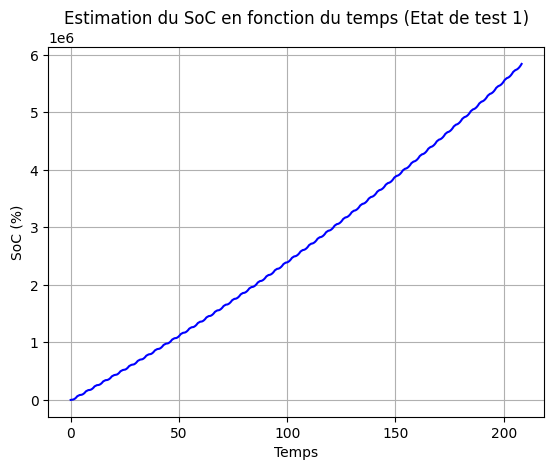

In [116]:
# Filtrer les données pour l'état de test 1
df_etat_1 = df[df['Etat_step'] == 1]

# Tracer le SoC en fonction du temps pour l'état de test 1
plt.plot(df_etat_1['t'], df_etat_1['soc'], color='blue')
plt.title('Estimation du SoC en fonction du temps (Etat de test 1)')
plt.xlabel('Temps')
plt.ylabel('SoC (%)')
plt.grid(True)
plt.show()

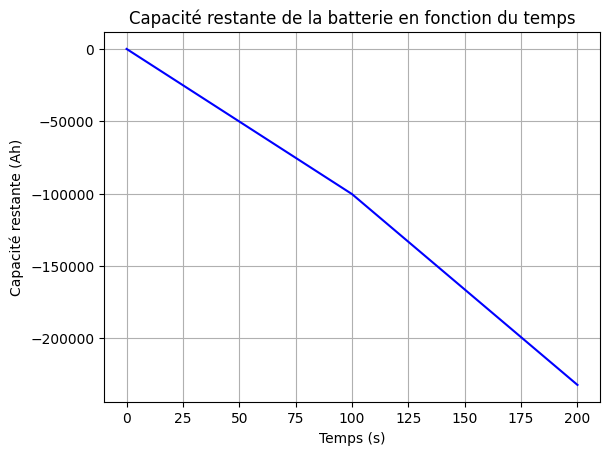

In [120]:
# Capacité nominale maximale de la batterie
capacite_nominale_maximale = 4.2  # par exemple, en Ah

# Fonction pour calculer Q_remaining(t)
def calcul_q_remaining(df, temps):
    # Filtrer les données jusqu'au temps t
    df_temps = df[df['t'] <= temps]
    # Calculer la charge cumulée jusqu'au temps t
    charge_cumulee = df_temps['Ah'].sum()
    # Calculer Q_remaining(t)
    q_remaining = capacite_nominale_maximale - charge_cumulee
    return q_remaining

# Création d'une liste de temps pour lesquels nous voulons calculer Q_remaining(t)
temps = range(0, int(df['t'].max()), 100)  # Par exemple, de 0 à la valeur maximale de temps dans le dataframe, avec un pas de 100 secondes

# Calculer Q_remaining(t) pour chaque temps dans la liste
q_remaining_values = [calcul_q_remaining(df, t) for t in temps]

# Tracer Q_remaining(t)
plt.plot(temps, q_remaining_values, color='blue')
plt.title('Capacité restante de la batterie en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('Capacité restante (Ah)')
plt.grid(True)
plt.show()


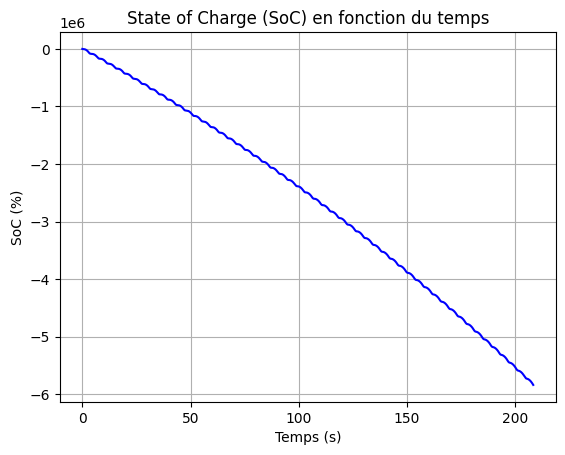

In [124]:
# Capacité nominale maximale de la batterie
capacite_nominale_maximale = 4.2  # par exemple, en Ah

# Calculer la charge totale consommée jusqu'à chaque temps
df['charge_cumulee'] = df['Ah'].cumsum()

# Calculer la capacité restante de la batterie à chaque temps
df['q_remaining'] = capacite_nominale_maximale - df['charge_cumulee']

# Calculer le SoC à chaque temps
df['soc'] = (df['q_remaining'] / capacite_nominale_maximale) * 100

# Tracer le SoC en fonction du temps
plt.plot(df['t'], df['soc'], color='blue')
plt.title('State of Charge (SoC) en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('SoC (%)')
plt.grid(True)
plt.show()

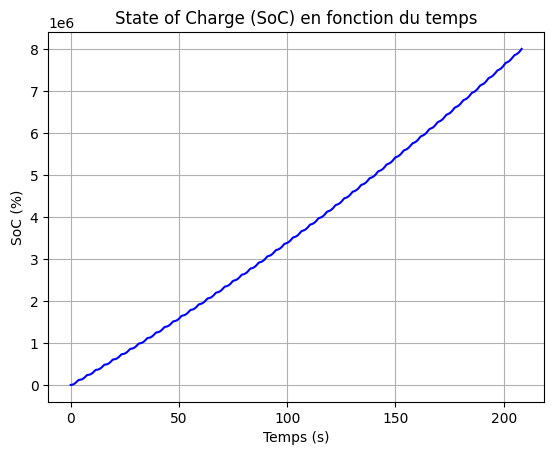

In [126]:
# Capacité nominale maximale de la batterie
capacite_nominale_maximale = 4.2  # par exemple, en Ah

# Calculer la charge cumulée (intégration de la charge)
df['charge_cumulee'] = df['Ah_Charge'].cumsum()

# Calculer la décharge cumulée (intégration de la décharge)
df['decharge_cumulee'] = df['Ah_Discharge'].cumsum()

# Calculer la capacité cumulée (charge - décharge)
df['capacite_cumulee'] = df['charge_cumulee'] - df['decharge_cumulee']

# Calculer le SoC en fonction de la capacité cumulée
df['soc'] = (df['capacite_cumulee'] / capacite_nominale_maximale) * 100

# Tracer le SoC en fonction du temps
plt.plot(df['t'], df['soc'], color='blue')
plt.title('State of Charge (SoC) en fonction du temps')
plt.xlabel('Temps (s)')
plt.ylabel('SoC (%)')
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (208303,) and (1,)

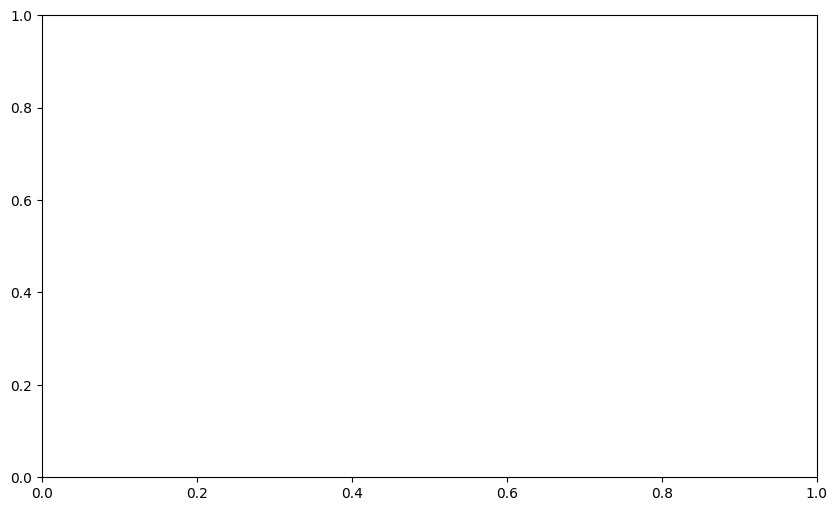

In [118]:
def estimer_soc(df):
    dt = df['t'].diff()  # Calculer la différence de temps entre les échantillons
    charge_in = (df['Ah'] > 0) * df['Ah'] * dt  # Calculer la charge entrante (courant positif)
    charge_out = (df['Ah'] < 0) * df['Ah'] * dt  # Calculer la charge sortante (courant négatif)
    soc = (charge_in.sum() - charge_out.sum()) / (3600 * 4.2) * 100  # SOC en pourcentage
    return soc

# Estimer le SOC à partir du dataframe
soc_estime = estimer_soc(df)

# Tracer le graphe SOC en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df['t'], soc_estime)
plt.title('Estimation du SOC en fonction du temps')
plt.xlabel('Temps')
plt.ylabel('SOC (%)')
plt.grid(True)
plt.show()

In [33]:
# Créer une liste pour stocker les résultats des modèles
resultats = []

# Répéter l'opération pour 10 échantillons
for i in range(10):
    # Extraire un échantillon de taille 1000
    echantillon = df.sample(n=1000, random_state=i)
    
    # Diviser l'échantillon en features (X) et la cible (y)
    X = echantillon[['t']]
    y = echantillon['BMS_Tension_A']
    
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer un objet de modèle de régression linéaire
    model = LinearRegression()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Coefficients de régression
    coefficients = model.coef_
    
    # Erreur quadratique moyenne
    mse = mean_squared_error(y_test, y_pred)
    
    # Coefficient de détermination (R²)
    r2 = r2_score(y_test, y_pred)
    
    # Ajouter les résultats à la liste
    resultats.append({'Coefficients': coefficients, 'MSE': mse, 'R2': r2})

# Afficher les résultats
for i, resultat in enumerate(resultats):
    print(f"Résultats pour l'échantillon {i+1}:")
    print("Coefficients de régression:", resultat['Coefficients'])
    print("Mean Squared Error:", resultat['MSE'])
    print("Coefficient of Determination (R²):", resultat['R2'])
    print("\n")

# Faire une conclusion basée sur les résultats obtenus
# Vous pouvez comparer les performances des différents modèles et tirer des conclusions sur la fiabilité des prédictions.

Résultats pour l'échantillon 1:
Coefficients de régression: [0.00078036]
Mean Squared Error: 1.7278553068237779
Coefficient of Determination (R²): -0.011984684204021212


Résultats pour l'échantillon 2:
Coefficients de régression: [-0.00023288]
Mean Squared Error: 2.1370166788306246
Coefficient of Determination (R²): -0.008730579735941602


Résultats pour l'échantillon 3:
Coefficients de régression: [0.00010845]
Mean Squared Error: 2.133547691151422
Coefficient of Determination (R²): -0.007088969994423655


Résultats pour l'échantillon 4:
Coefficients de régression: [-0.00067684]
Mean Squared Error: 1.8743236031850194
Coefficient of Determination (R²): -0.004213344305222355


Résultats pour l'échantillon 5:
Coefficients de régression: [-0.00074846]
Mean Squared Error: 2.0554791095494567
Coefficient of Determination (R²): -0.00788386468400426


Résultats pour l'échantillon 6:
Coefficients de régression: [0.00039653]
Mean Squared Error: 1.744602555238089
Coefficient of Determination (R²)

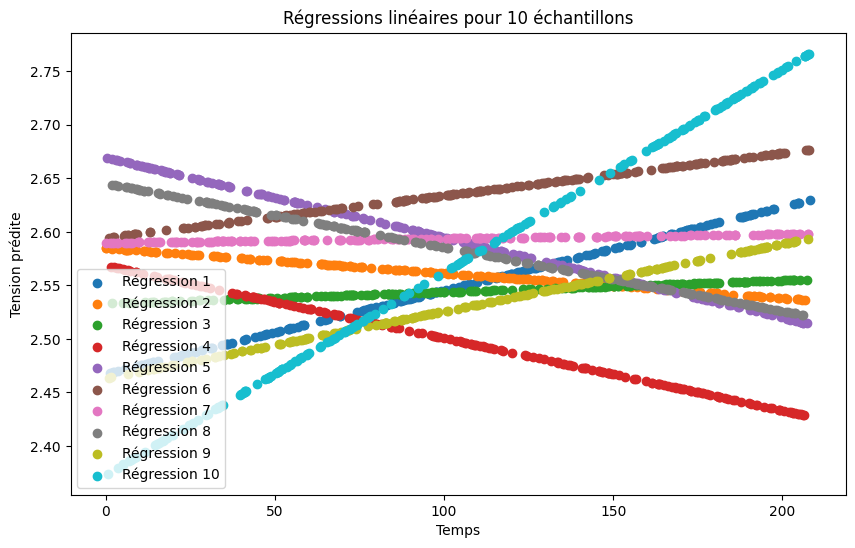

In [40]:
# Créer une liste pour stocker les résultats des modèles
resultats = []

# Créer une figure pour le tracé
plt.figure(figsize=(10, 6))

# Répéter l'opération pour 10 échantillons
for i in range(10):
    # Extraire un échantillon de taille 1000
    echantillon = df.sample(n=1000, random_state=i)
    
    # Diviser l'échantillon en features (X) et la cible (y)
    X = echantillon[['t']]
    y = echantillon['BMS_Tension_A']
    
    # Diviser les données en ensemble d'entraînement et ensemble de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Créer un objet de modèle de régression linéaire
    model = LinearRegression()
    
    # Entraîner le modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)
    
    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Ajouter les résultats à la liste
    resultats.append({'t': X_test.values.flatten(), 'Tension_predite': y_pred})

# Tracer les résultats de toutes les régressions
for i, resultat in enumerate(resultats):
    temps = resultat['t']
    tension_predite = resultat['Tension_predite']
    plt.scatter(temps, tension_predite, label=f'Régression {i+1}')

# Ajouter une légende et des labels d'axes
plt.xlabel('Temps')
plt.ylabel('Tension prédite')
plt.title('Régressions linéaires pour 10 échantillons')
plt.legend()
plt.show()

In [ ]:
# Fonction pour modéliser la chute de tension lors de la décharge de la batterie
def drop_tension(t, Ri, Voc):
    return Voc - Ri * t

# Fonction pour estimer la résistance interne pour un intervalle de temps donné avec un courant de décharge négatif
def estimer_resistance_interne_interval(df_interval):
    # Sélectionner les données de décharge avec un courant négatif
    df_decharge = df_interval[df_interval['Ah'] < 0]
    
    # Estimer la résistance interne en ajustant la courbe à l'aide de la méthode des moindres carrés
    popt, _ = curve_fit(drop_tension, df_decharge['t'], df_decharge['BMS_Tension_A'])
    resistance_interne = popt[0]  # Le premier élément de popt est la résistance interne estimée
    
    return resistance_interne

# Fonction pour diviser les données de décharge en intervalles de temps et estimer la résistance interne pour chaque intervalle
def estimer_resistance_interne_dynamique(df, num_intervals=10):
    # Diviser les données en intervalles de temps égaux
    interval_length = len(df) // num_intervals
    intervals = [df.iloc[i*interval_length:(i+1)*interval_length] for i in range(num_intervals)]
    
    # Estimer la résistance interne pour chaque intervalle
    resistances = [estimer_resistance_interne_interval(interval) for interval in intervals]
    
    return resistances

# Charger les données de décharge de la batterie depuis le dataframe df
# Supposons que 'Temps' est en secondes et 'Tension' est en volts
# df_decharge = df[df['Courant'] < 0]  # Sélectionnez uniquement les données de décharge si nécessaire

# Appeler la fonction pour estimer la résistance interne dynamique
resistances_dynamiques = estimer_resistance_interne_dynamique(df_decharge)

# Afficher les estimations de résistance interne pour chaque intervalle de temps
print("Estimations de la résistance interne pour chaque intervalle de temps :")
for i, resistance in enumerate(resistances_dynamiques):
    print(f"Intervalle {i+1}: {resistance} Ohms")

# Charger les données de décharge de la batterie depuis le dataframe df
# Supposons que 'Temps' est en secondes et 'Tension' est en volts
# df_decharge = df[df['Courant'] < 0]  # Sélectionnez uniquement les données de décharge si nécessaire

# Appeler la fonction pour estimer la résistance interne dynamique
resistances_dynamiques = estimer_resistance_interne_dynamique(df_decharge)

# Créer une liste des temps de début de chaque intervalle
temps_debut_intervalles = [interval['Temps'].iloc[0] for interval in intervals]

# Tracer le graphique de la résistance en fonction du temps
plt.plot(temps_debut_intervalles, resistances_dynamiques, marker='o')
plt.xlabel('Temps (s)')
plt.ylabel('Résistance interne (Ohms)')
plt.title('Résistance interne de la batterie en fonction du temps de décharge')
plt.grid(True)
plt.show()

test

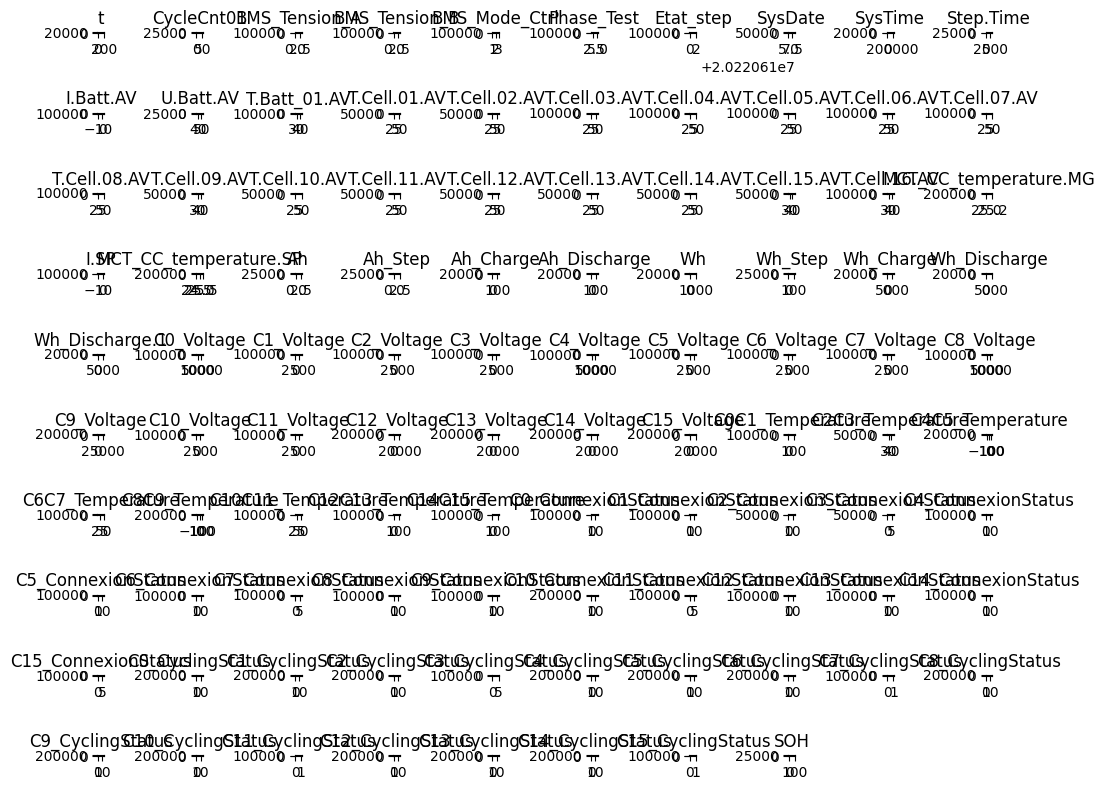

In [74]:
# Histogrammes
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


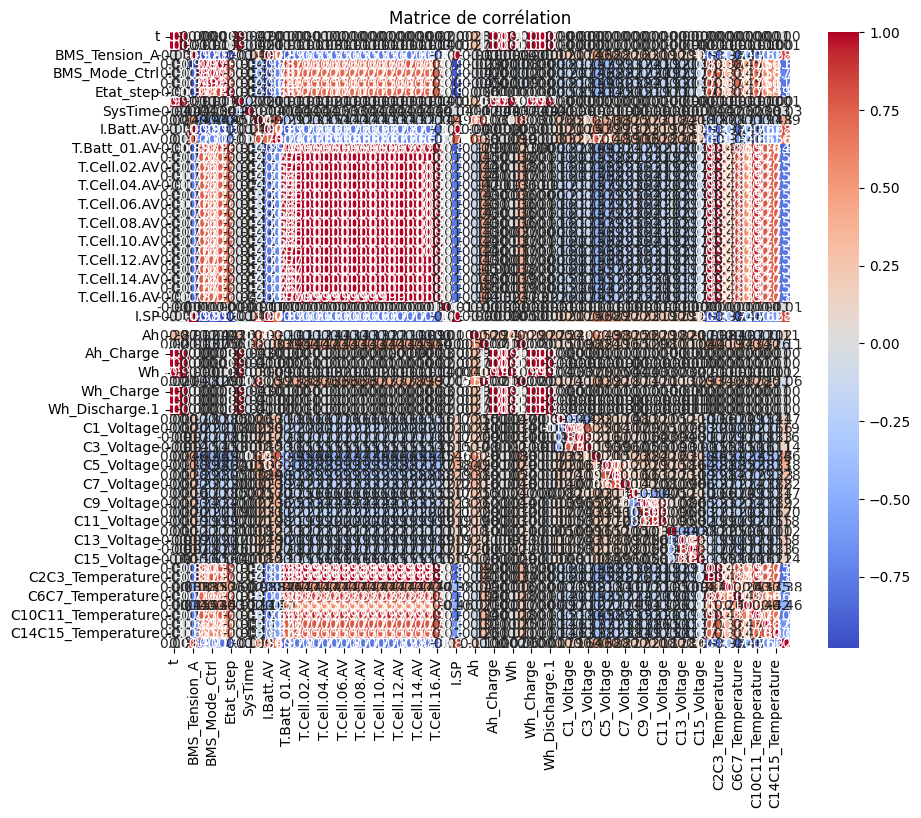

In [75]:
# Calculer la matrice de corrélation
# Sélectionner uniquement les colonnes à inclure dans la matrice de corrélation
colonnes_a_inclure = df.columns[:-32]

# Calculer la matrice de corrélation en utilisant les colonnes sélectionnées
correlation_matrix = df[colonnes_a_inclure].corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()